In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import cv2


#from PIL import Image 
base_path = '../data/'

In [21]:
import tifffile as tiff
import numpy as np

def get_rgb(ID):
    # Load Blue (B2), Green (B3) and SWIR 2 (B7) bands

    if ID[0:4] in ['LT05','LE07']:
        # Landsat 5 and 7
        R = tiff.imread(base_path+'{}/{}_SR_B5.TIF'.format(ID, ID))
        G = tiff.imread(base_path+'{}/{}_SR_B2.TIF'.format(ID, ID))
        B = tiff.imread(base_path+'{}/{}_SR_B1.TIF'.format(ID, ID))
    else:
        # Landsat 8 and 9
        R = tiff.imread(base_path+'{}/{}_SR_B7.TIF'.format(ID, ID))
        G = tiff.imread(base_path+'{}/{}_SR_B3.TIF'.format(ID, ID))
        B = tiff.imread(base_path+'{}/{}_SR_B2.TIF'.format(ID, ID))

    # Stack and scale bands
    RGB = np.dstack((R, G, B))
    RGB = np.clip(RGB*0.0000275-0.2, 0, 1)

    # Clip to enhance contrast
    RGB = np.clip(RGB,0,0.2)/0.2
    
    return RGB

In [3]:
df_label = pd.read_csv('../data/label_scenes.csv')

print(len(df_label))
df_label.head()

100


,year,altitude_category,id,path,row,satellite,cloud_cover,tier,utm_zone,lat,lon,date,time,month,altitude,task
0,2017,high,LC08_L2SP_205023_20170505_20200904_02_T1,205,23,8,2,1,30,53.10266,-5.02235,2017-05-05,2017-05-05 11:15:45.516137,5,51.383728,1
1,2019,high,LC08_L2SP_205023_20190628_20200827_02_T1,205,23,8,9,1,30,53.10258,-5.04996,2019-06-28,2019-06-28 11:16:20.726652,6,57.582579,2
2,2020,high,LC08_L2SP_205023_20200529_20200820_02_T1,205,23,8,2,1,30,53.10270,-5.03278,2020-05-29,2020-05-29 11:15:55.184734,5,56.487645,3
3,2015,low,LC08_L2SP_205024_20150124_20200910_02_T1,205,24,8,4,1,30,51.69320,-5.72348,2015-01-24,2015-01-24 11:16:47.907172,1,17.108840,4
4,2015,high,LC08_L2SP_205024_20150719_20200909_02_T1,205,24,8,5,1,30,51.69345,-5.70362,2015-07-19,2015-07-19 11:16:25.474865,7,56.077386,5


In [12]:
label_names = os.listdir(base_path + 'rough labels/')

#sort labels
label_names = sorted(label_names)

print(len(label_names))

label_names

33


['task-306-annotation-13-by-1-tag-Land-0.npy',
 'task-307-annotation-14-by-1-tag-Land-0.npy',
 'task-308-annotation-15-by-1-tag-Land-0.npy',
 'task-309-annotation-9-by-1-tag-Land-0.npy',
 'task-309-annotation-9-by-1-tag-Land-1.npy',
 'task-310-annotation-16-by-1-tag-Land-0.npy',
 'task-311-annotation-17-by-1-tag-Land-0.npy',
 'task-312-annotation-18-by-1-tag-Land-0.npy',
 'task-313-annotation-19-by-1-tag-Land-0.npy',
 'task-314-annotation-20-by-1-tag-Land-0.npy',
 'task-315-annotation-10-by-1-tag-Land-0.npy',
 'task-316-annotation-21-by-1-tag-Land-0.npy',
 'task-317-annotation-22-by-1-tag-Land-0.npy',
 'task-318-annotation-23-by-1-tag-Land-0.npy',
 'task-319-annotation-24-by-1-tag-Land-0.npy',
 'task-320-annotation-25-by-1-tag-Land-0.npy',
 'task-320-annotation-25-by-1-tag-Land-1.npy',
 'task-321-annotation-26-by-1-tag-Land-0.npy',
 'task-322-annotation-27-by-1-tag-Land-0.npy',
 'task-323-annotation-28-by-1-tag-Land-0.npy',
 'task-324-annotation-29-by-1-tag-Land-0.npy',
 'task-325-anno

In [46]:
masks = []

prev_task = None
for label in label_names:

    task = label.split('-')[1]

    mask = np.load(base_path + 'rough labels/' + label)
    mask = np.clip(mask,0,1)

    if task != prev_task:
        masks.append(mask)
    else:
        print(task)
        masks[-1] = masks[-1] + mask
        masks[-1] = np.clip(masks[-1],0,1)


    prev_task = task
print(len(masks))

309
320
328
30


In [42]:
id = "LC08_L2SP_205023_20170505_20200904_02_T1"
RGB = get_rgb(id)

flag = RGB[:,:,]==[0,0,0]
flag = np.sum(flag,axis=2)
flag = flag==3

masks[0][flag]  = 0

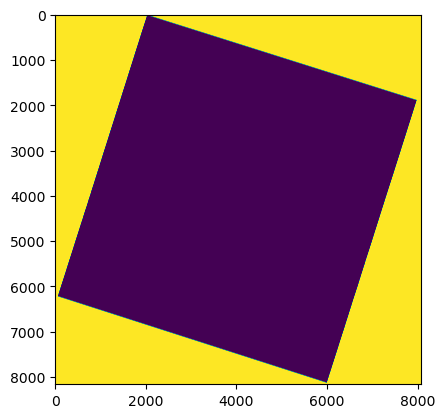

In [38]:
flag.shape

plt.imshow(flag)

In [47]:
for i, mask in enumerate(masks):

    try: 
        id = df_label.iloc[i]['id']
        
        RGB = get_rgb(id)

        # make mask = 0 where RGB = 0

        flag = RGB[:,:,]==[0,0,0]
        flag = np.sum(flag,axis=2)
        flag = flag==3
        
        masks[i][flag] = 0
    except:
        print(id)

LC08_L2SP_206022_20140418_20200911_02_T1
LC08_L2SP_206022_20140723_20200911_02_T1
LC08_L2SP_206022_20170325_20200904_02_T1
LC08_L2SP_206022_20180702_20200831_02_T1
LC08_L2SP_206022_20230310_20230320_02_T1
LC08_L2SP_208024_20220305_20220314_02_T1


In [30]:
set(masks[0].ravel())

{0, 1}

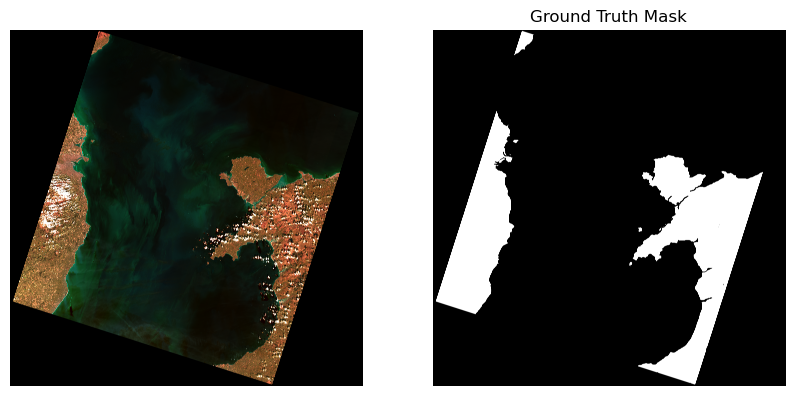

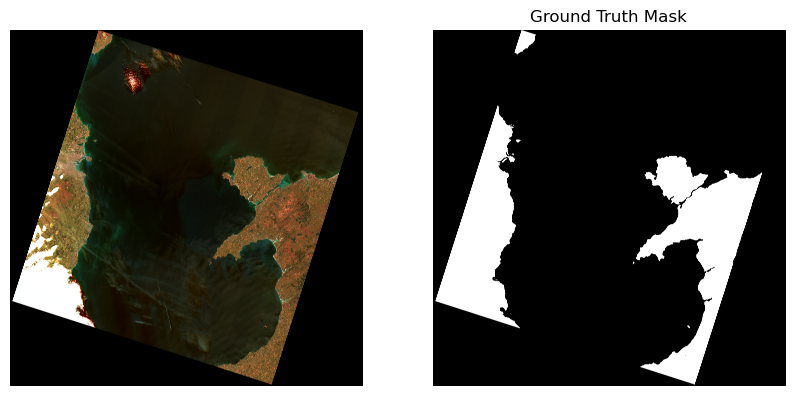

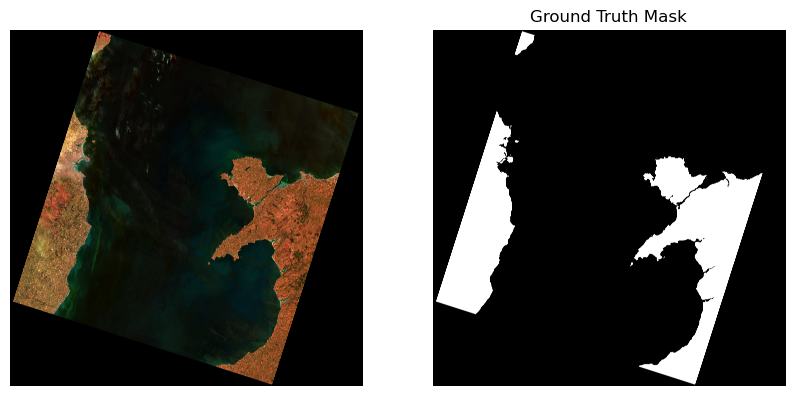

In [49]:
for i, mask in enumerate(masks[0:3]):

    fig,ax = plt.subplots(1,2,figsize=(10,20))

    id = df_label.iloc[i]['id']
    
    RGB = get_rgb(id)

    # reduce RGB dimensions
    #RGB = cv2.resize(RGB, (int(mask.shape[1]/10), int(mask.shape[0]/10)), interpolation = cv2.INTER_AREA)

    ax[0].imshow(RGB)
    ax[0].title.set_text("")

    ax[1].imshow(mask,cmap='gray')
    ax[1].title.set_text("Ground Truth Mask")

    ax[0].axis('off')
    ax[1].axis('off')

